<a href="https://colab.research.google.com/github/iratuh/DMBI_UI_24/blob/main/DMBIUI_CS6_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center><font color="A0D8E9"> Case Study 6 Text Mining: Group 1 </font></center>**

Case study: Natural Language Processing with Disaster Tweets

Tujuan dari Case Study: Text Classification

**Anggota Kelompok**

| Nama            | NPM         |
|------------------|-------------|
| Hutari Andini    | 2206820680  |
| Galank Zamer    | 2206051393  |
| Rachelle Melody d'Lyra Soentara    | 2206051456  |
| Kartika Rizkia Zuhrah     | 2206027993  |
| Luthfi Athallah    | 2206826980  |



# **<center><font color="A0D8E9"> Context of the Case Study </font></center>**

We are challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. We have a dataset of 10,000 tweets that were hand classified.

Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

Tweet source: https://twitter.com/AnyOtherAnnaK/status/629195955506708480

#<font color="90C796">**Data Preparation and Preprocessing**</font>


In [ ]:
"""
Import package/library yang diperlukan
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

# untuk pre-processing teks
import re, string

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

#untuk pembangunan model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
nltk.download('punkt_tab')

import re

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import VotingClassifier

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

In [ ]:
import gdown
url = 'https://drive.google.com/drive/folders/1Fa-8bVaLC3lqq32LOuS_zievS9OY4rR1?usp=drive_link'
gdown.download_folder(url)

Retrieving folder contents


Processing file 1Wi5IeYJeJ5Mc7safRVbDcPCx9DFyIaCF nlp-getting-started.zip
Processing file 1MHfQoieTskfSUtpfNOccDwKGzRzR1Zye sample_submission.csv
Processing file 1Jen9lFv1iDQlOIsqbFCtoCKm65P22rk1 test.csv
Processing file 1NWtzY5G4GqbPekhS5WMwgjYPL6ixdNwQ train.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Wi5IeYJeJ5Mc7safRVbDcPCx9DFyIaCF
To: /content/CS Text Mining/nlp-getting-started.zip
100%|██████████| 607k/607k [00:00<00:00, 83.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MHfQoieTskfSUtpfNOccDwKGzRzR1Zye
To: /content/CS Text Mining/sample_submission.csv
100%|██████████| 22.7k/22.7k [00:00<00:00, 35.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Jen9lFv1iDQlOIsqbFCtoCKm65P22rk1
To: /content/CS Text Mining/test.csv
100%|██████████| 421k/421k [00:00<00:00, 35.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NWtzY5G4GqbPekhS5WMwgjYPL6ixdNwQ
To: /content/CS Text Mining/train.csv
100%|██████████| 988k/988k [00:00<00:00, 103MB/s]
Download completed


['/content/CS Text Mining/nlp-getting-started.zip',
 '/content/CS Text Mining/sample_submission.csv',
 '/content/CS Text Mining/test.csv',
 '/content/CS Text Mining/train.csv']

In [ ]:
#Pendefinisian dataframe yang akan digunakan
train = pd.read_csv("/content/AnDat Kategorik/train.csv")
test = pd.read_csv("/content/AnDat Kategorik/test.csv")

NameError: name 'pd' is not defined

**A quick look at our data!!** 👀

In [ ]:
print(train.shape)
train.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


From this, we know that, it contains:

| Field    | Description                                              |
|----------|----------------------------------------------------------|
| id       | A unique identifier for the tweet                       |
| keyword  | A keyword from that tweet (although this may be blank!) |
| location | The location the tweet was sent from (may also be blank)|
| text     | The text of a tweet                                      |
| target   | 1 if the tweet is a real disaster or 0 if not (in train dataframe only)            |


In [ ]:
print(test.shape)
test.head()

(3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# Mengambil contoh dari tweet yang mengandung bencana dan tidak
print(f"Example of disaster tweet: {train.text[train.target == 1].iloc[2]}")
print(f"Example of non-disaster tweet: {train.text[train.target == 0].iloc[42]}")

Example of disaster tweet: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Example of non-disaster tweet: RT @SleepJunkies: Sleeping pills double your risk of a car accident http://t.co/7s9Nm1fiCT


target
0    4342
1    3271
Name: count, dtype: int64


<ipython-input-8-5c77c4047801>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x.index, y=x, palette="viridis")


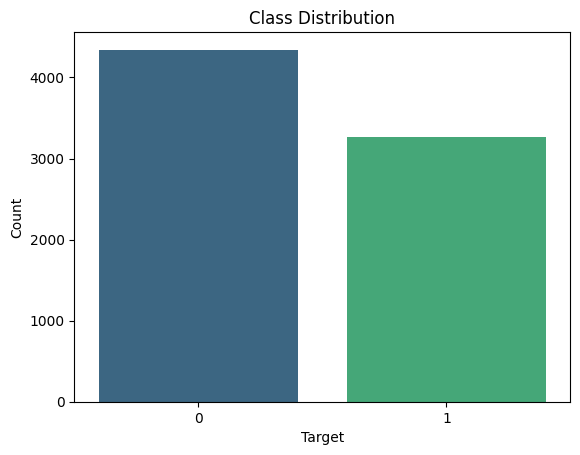

In [ ]:
# CLASS DISTRIBUTION
# mengecek apakah dataset yang digunakan imbalanced atau tidak

x = train['target'].value_counts()
print(x)

sns.barplot(x=x.index, y=x, palette="viridis")

plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

Tidak terdapat imbalanced pada data train.

In [ ]:
# Memeriksa missing values
train.isna().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


Mengingat kita hanya akan fokus pada klasifikasi text dan targetnya saja, jadi permasalahan missing values pada keyword dan location tidak terlalu dihiraukan. Dapat dilihat pula, pada atrribute `text` dan `target` tidak terdapat missing values. Artinya, tidak dilakukan penanganan missing values (imputasi) apapun.

In [ ]:
# untuk pre-processing teks

text = "RT @SleepJunkies: Sleeping pills double your risk of a car accident http://t.co/7s9Nm1fiCT"

# fungsi clean words
def clean_words(text, extra_stops = None):
    text = re.sub(r'(http.*)|#', '', text)
    tokens = word_tokenize(text)
    stops = stopwords.words('english') + (extra_stops if extra_stops else [])
    clean_tokens = [token.lower() for token in tokens if token.lower() not in stops and token.isalnum()]
    return ' '.join(clean_tokens)

# mengubah ke huruf kecil (lowercase) dan menghapus tanda baca, karakter aneh, dan strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #Menghapus leading/trailing whitespace
    text = re.sub('@[^\s]+','atUser',text) #mengubah @user menjadi atUser
    text = re.sub(r'#([^\s]+)', r'\1', text) #menghapus hashtag di depan suatu kata
    text= re.compile('<.*?>').sub('', text) #Menghapus HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Menghapus extra space dan tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text= re.sub(r'[^\w\s]', '', str(text).strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace
    text = re.sub(r'(http.*)|#', '', text)

    return text
preprocess(text)

'rt atUser sleeping pills double your risk of a car accident '

Kata-kata "atUser" yang didefinisikan pada cleaning text sebelumynya, dipreprocessing dan terkena process cleaning dari dictionary stopwords pada NLTK.

In [ ]:
df_train = train[["id","text","target"]]
df_train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_test = test[["id","text"]]
df_test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Trial untuk melakukan cleaning text pada 10 data pertama
df_coba = df_train[0:10]
df_coba['clean_text'] = df_coba['text'].apply(lambda x: clean_words(preprocess(x)))
df_coba.head()

<ipython-input-14-e42f658db58e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coba['clean_text'] = df_coba['text'].apply(lambda x: clean_words(preprocess(x)))


,id,text,target,clean_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [ ]:
# Melakukan cleaning dan membuat kolom baru menjadi kolom clean_text pada seluruh data train
df_train['clean_text'] = df_train['text'].apply(lambda x: clean_words(preprocess(x)))
df_test['clean_text']= df_test['text'].apply(lambda x: clean_words(preprocess(x)))

df_train.head()

<ipython-input-15-ad5ee3d2b2cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['clean_text'] = df_train['text'].apply(lambda x: clean_words(preprocess(x)))
<ipython-input-15-ad5ee3d2b2cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['clean_text']= df_test['text'].apply(lambda x: clean_words(preprocess(x)))


,id,text,target,clean_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [ ]:
# Mengecek kata-kata apa yang paling sering muncul
def make_freq(data):
    all_tweets = " ".join(data)

    tokens = word_tokenize(all_tweets)
    frequency = FreqDist(tokens)

    return frequency

make_freq(df_train["clean_text"])

FreqDist({'atuser': 2453, 'like': 344, 'amp': 324, 'fire': 247, 'get': 226, 'new': 213, 'people': 198, 'one': 195, 'news': 156, 'disaster': 154, ...})

Pada dataset yang dimiliki, diperoleh kata yang paling sering muncul adalah 'atuser' yang digunakan untuk mention akun lain dalam cuitan.

In [ ]:
# Melakukan pengecekan kata apa yang paling sering muncul pada data yang mengandung bencana dan tidak
disasters = df_train["clean_text"][df_train.target == 1]
no_disasters = df_train["clean_text"][df_train.target == 0]

In [ ]:
print("Kata terbanyak yang membahas mengenai bencana:")
make_freq(disasters)

Kata terbanyak yang membahas mengenai bencana:


FreqDist({'atuser': 761, 'fire': 177, 'amp': 129, 'disaster': 119, 'news': 115, 'california': 114, 'suicide': 111, 'police': 109, 'people': 104, 'like': 90, ...})

In [ ]:
print("Kata terbanyak yang bukan membahas mengenai bencana:")
make_freq(no_disasters)

Kata terbanyak yang bukan membahas mengenai bencana:


FreqDist({'atuser': 1692, 'like': 254, 'amp': 195, 'get': 163, 'new': 159, 'one': 131, 'body': 112, 'would': 100, 'people': 94, 'got': 93, ...})

In [ ]:
# Cleaning berdasarkan eksplorasi kata terbanyak
extra_stops = ["atuser","amp","like","get","got","new","one","would"]

def full_prepare(data, extra_stops = None):
    data.clean_text = data.clean_text.apply(lambda x: clean_words(preprocess(x), extra_stops))

    return data

df_train = full_prepare(df_train, extra_stops)

disasters = df_train["clean_text"][df_train.target == 1]
no_disasters = df_train["clean_text"][df_train.target == 0]

<ipython-input-20-3f180fd3d16e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.clean_text = data.clean_text.apply(lambda x: clean_words(preprocess(x), extra_stops))


In [ ]:
# Mengecek kembali setelah extra_stops
print("Kata terbanyak yang membahas mengenai bencana:")
make_freq(disasters)

Kata terbanyak yang membahas mengenai bencana:


FreqDist({'fire': 177, 'disaster': 119, 'news': 115, 'california': 114, 'suicide': 111, 'police': 109, 'people': 104, 'storm': 89, 'hiroshima': 89, 'pm': 86, ...})

In [ ]:
# Mengecek kembali setelah extra_stops
print("Kata terbanyak yang bukan membahas mengenai bencana:")
make_freq(no_disasters)

Kata terbanyak yang bukan membahas mengenai bencana:


FreqDist({'body': 112, 'people': 94, 'love': 86, 'know': 86, 'day': 84, 'time': 83, 'back': 83, 'full': 82, 'see': 79, 'emergency': 78, ...})

In [ ]:
# Tokenisasi kata untuk kedua kategori
words_disasters = set(" ".join(disasters).split())
words_no_disasters = set(" ".join(no_disasters).split())

# Cari kata-kata yang muncul di kedua kategori
common_words = words_disasters.intersection(words_no_disasters)

# Menampilkan hasil
print("Kata-kata yang muncul di kedua kategori (disasters dan no_disasters):")
print(common_words)

Kata-kata yang muncul di kedua kategori (disasters dan no_disasters):
{'warned', 'tracking', 'gov', 'buffalo', 'oppressions', 'dollars', 'sep', 'happy', 'arson', 'troy', 'douchebag', 'pls', 'gun', 'country', 'federal', 'split', 'checked', 'debate', 'bro', 'installation', 'hundreds', 'contain', 'cinema', 'thunder', 'sitting', 'aka', 'alone', 'drag', 'scale', 'gay', 'cont', 'bands', 'guy', 'losing', 'must', 'mmmmmm', 'concept', 'ran', 'walter', 'choking', 'sadly', 'damaged', 'glorious', 'esp', 'goal', 'surah', 'human', 'dan', 'eaten', 'ptsdchat', 'join', 'ron', 'program', 'tak', 'terms', 'city', 'words', 'bar', 'gone', 'mine', 'thats', 'warne', 'lions', 'playlist', 'wife', 'north', 'oooooohhhh', 'cup', 'cain', 'wud', 'verdict', 'climate', 'van', 'canûªt', 'already', 'business', 'olap', 'photo', 'floor', 'direction', 'occurred', 'asleep', 'vehicles', 'episode', 'elizabeth', 'trap', 'points', 'record', 'tons', 'demolish', 'kerry', 'farrakhan', 'cow', 'spent', 'based', 'picture', 'options',

In [ ]:
# Aplikasikan ke kedua dataset
df_train = full_prepare(df_train, extra_stops)
df_test = full_prepare(df_test, extra_stops)

<ipython-input-20-3f180fd3d16e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.clean_text = data.clean_text.apply(lambda x: clean_words(preprocess(x), extra_stops))


In [ ]:
# Vectorizing tweet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

vectorizer = CountVectorizer()

vectors = vectorizer.fit_transform(df_train["clean_text"])
test_vectors = vectorizer.transform(df_test["clean_text"])
print(vectors[:1])

  (0, 2967)	1
  (0, 9691)	1
  (0, 3623)	1
  (0, 7354)	1
  (0, 309)	1
  (0, 4563)	1
  (0, 12723)	1


#<font color="90C796">**EDA**</font>


In [ ]:
# Data overview
dftrain = df_train[['clean_text','target']]
dftrain.groupby("target").describe()

clean_text                         
            count unique          top freq
target                                    
0            4342   3968  liked video   34
1            3271   2773                30

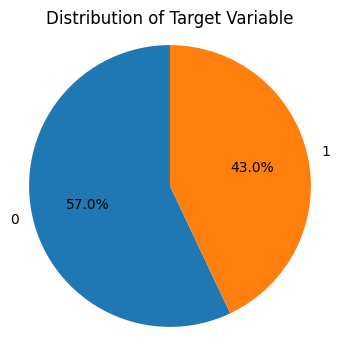

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_train' is your DataFrame and 'target' is the column with the counts
target_counts = df_train['target'].value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- Jumlah tweets di non disaster lebih banyak daripada tweets disaster
- Jumlah unique < count artinya ada beberapa repetisi di text dari tweets
- Kosong di top pada disaster artinya kemungkinan tidak ada single phrase yang dominan

##<font color="FEEB99">**Characters di tweets**</font>

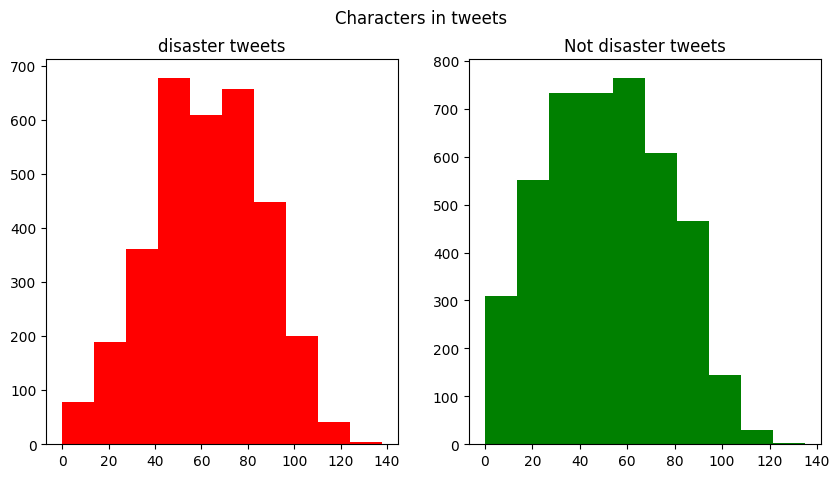

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=dftrain[dftrain['target']==1]['clean_text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=dftrain[dftrain['target']==0]['clean_text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

- Distribusi dari kedua (disaster dan not disaster) tweet terlihat mirip
- Characters yang paling umum ditemukan adalah antara 40-70

##<font color="FEEB99">**Words di tweets**</font>

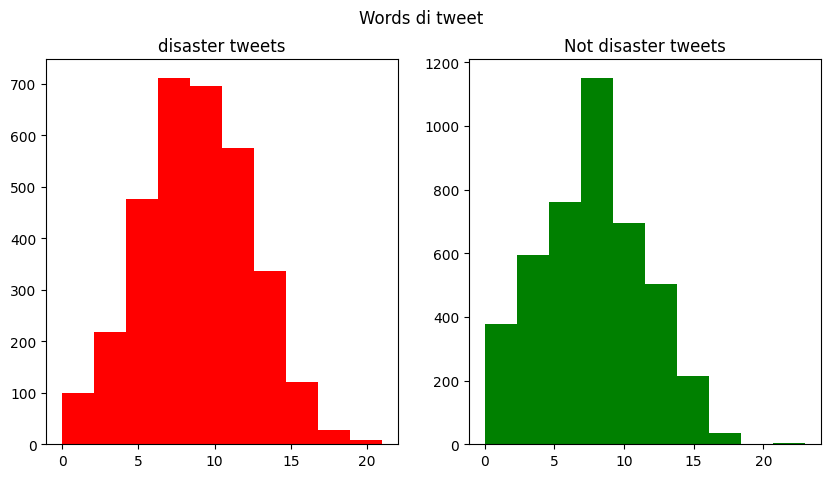

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=dftrain[dftrain['target']==1]['clean_text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=dftrain[dftrain['target']==0]['clean_text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words di tweet')
plt.show()

- Panjang kata di tweet memiliki distribusi seperti figure diatas

##<font color="FEEB99">**Most Common Words**</font>

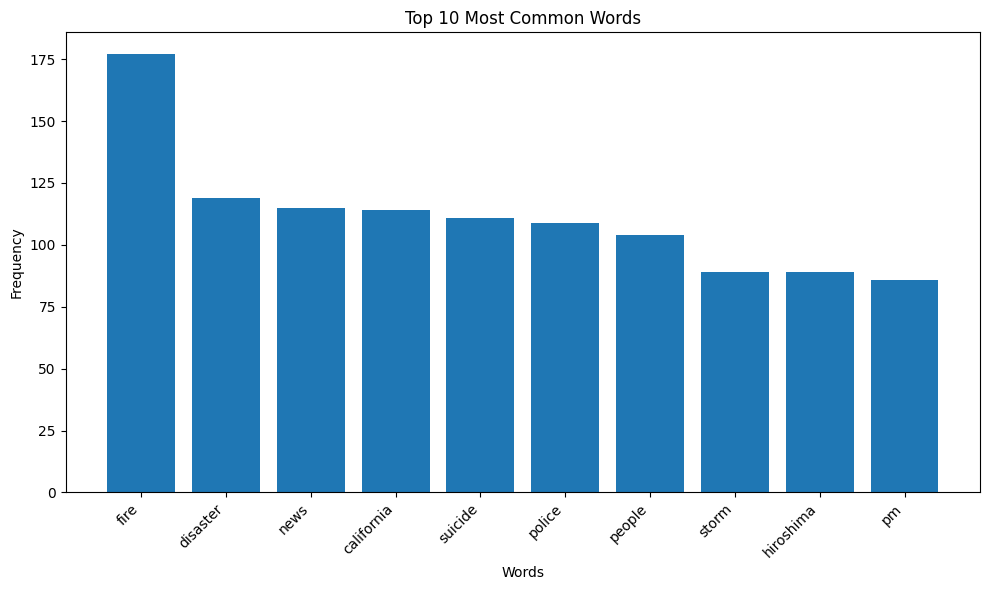

<Figure size 640x480 with 0 Axes>

In [ ]:
from collections import Counter

def plot_most_common_words(data, top_n=10):
    all_words = ' '.join(data).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(top_n)

    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Top {top_n} Most Common Words")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

disaster_tweets = df_train["clean_text"][df_train.target == 1]
plot_most_common_words(disaster_tweets)

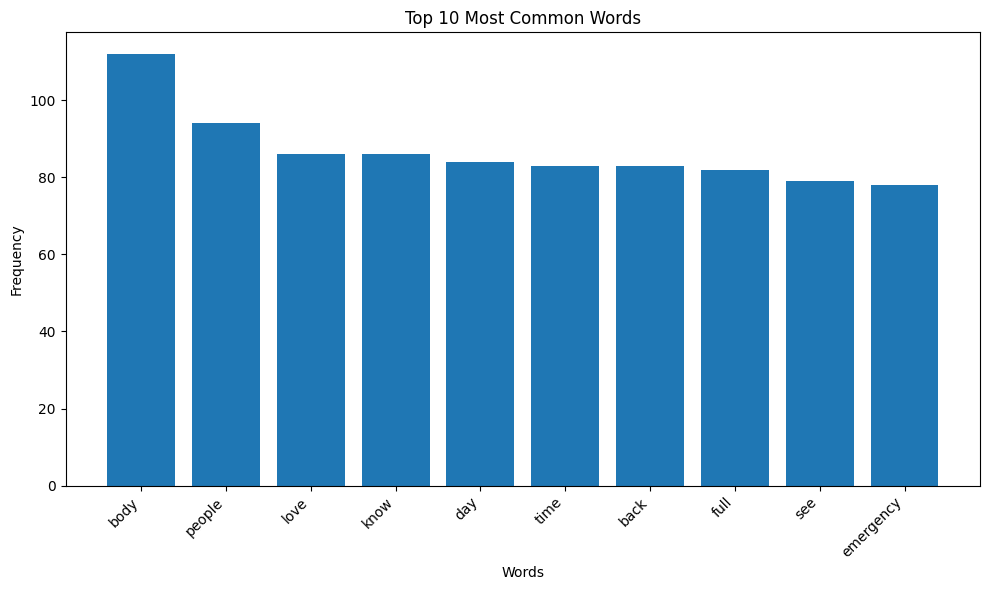

In [ ]:
nondisaster_tweets = df_train["clean_text"][df_train.target == 0]
plot_most_common_words(nondisaster_tweets)

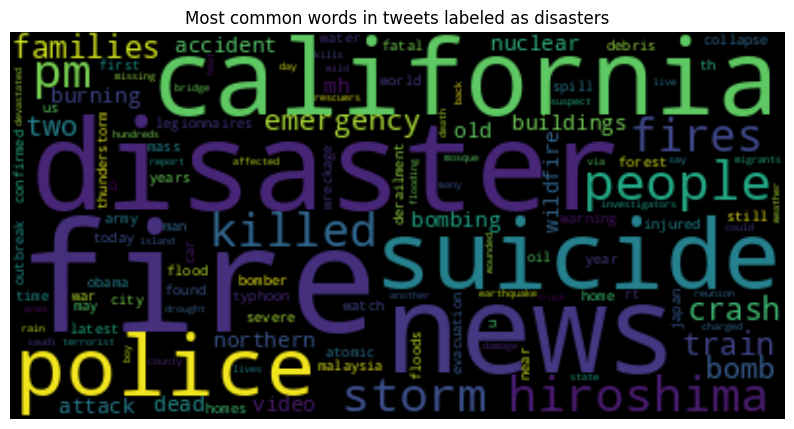

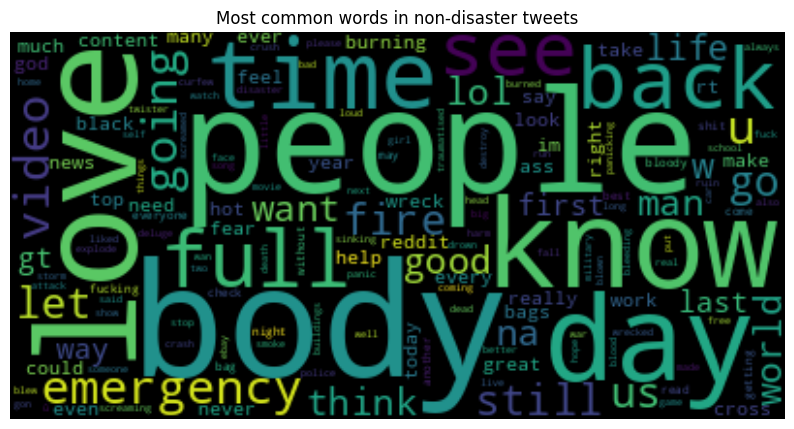

In [ ]:
def make_cloud(data, title = None):
    wordcloud = WordCloud().generate_from_frequencies(make_freq(data))

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(disasters, "Most common words in tweets labeled as disasters")
make_cloud(no_disasters, "Most common words in non-disaster tweets")

- kata kata yang paling sering muncul di tweet disaster : fire, disaster, news, california, suicide
- kata kata yang paling sering muncul di tweet nondisaster : body, love, people, know, day

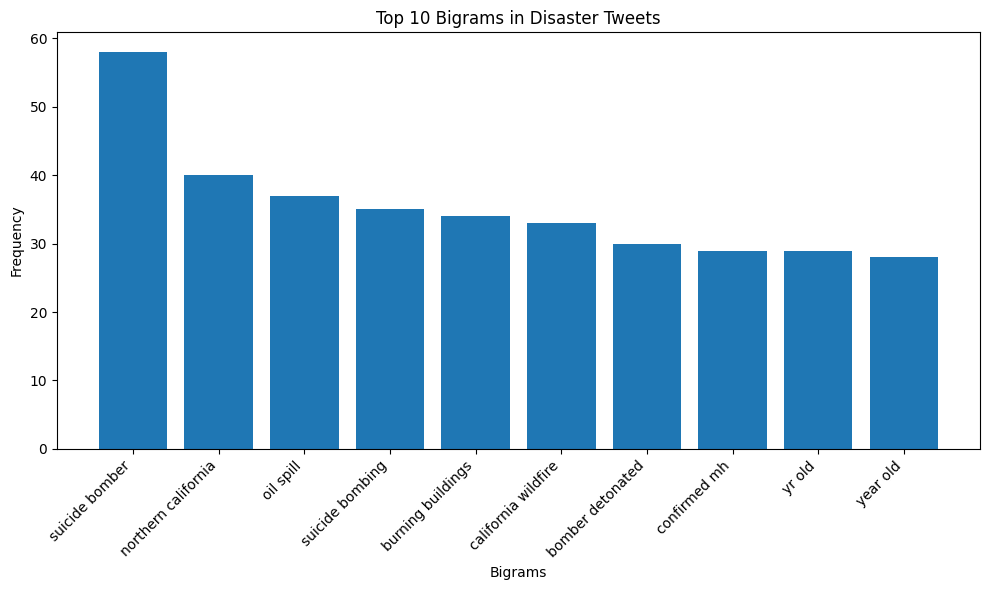

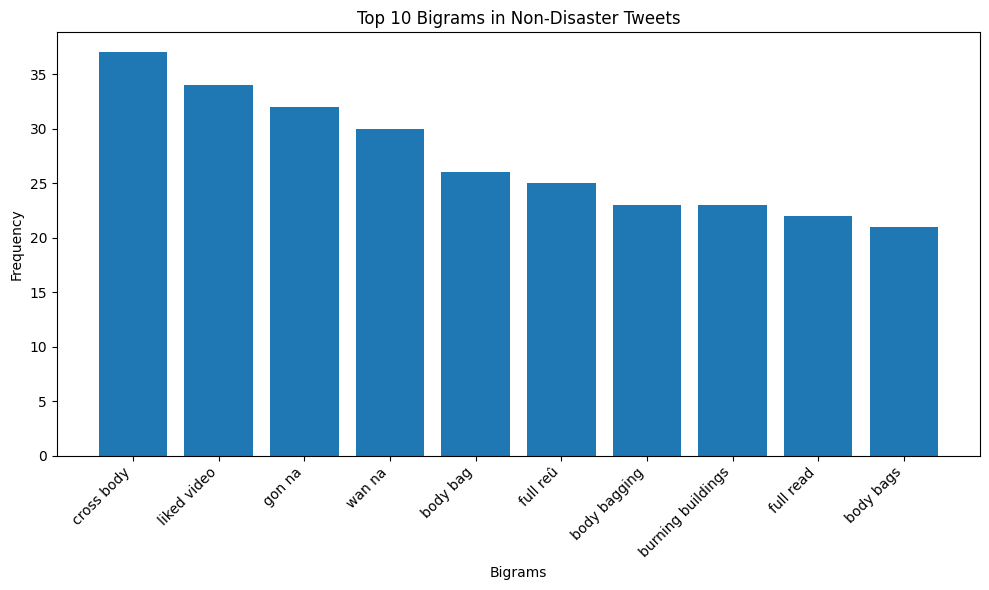

In [ ]:
from nltk import ngrams
from collections import Counter

def plot_bigram_counts(data, title):
    all_words = ' '.join(data).split()
    bigrams = list(ngrams(all_words, 2))
    bigram_counts = Counter(bigrams)

    top_bigrams = bigram_counts.most_common(10) # Get top 10 bigrams

    bigrams, counts = zip(*top_bigrams)
    bigram_labels = [' '.join(b) for b in bigrams] # Join bigrams for labels

    plt.figure(figsize=(10, 6))
    plt.bar(bigram_labels, counts)
    plt.xlabel("Bigrams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

disaster_tweets = df_train["clean_text"][df_train.target == 1]
plot_bigram_counts(disaster_tweets, "Top 10 Bigrams in Disaster Tweets")

nondisaster_tweets = df_train["clean_text"][df_train.target == 0]
plot_bigram_counts(nondisaster_tweets, "Top 10 Bigrams in Non-Disaster Tweets")

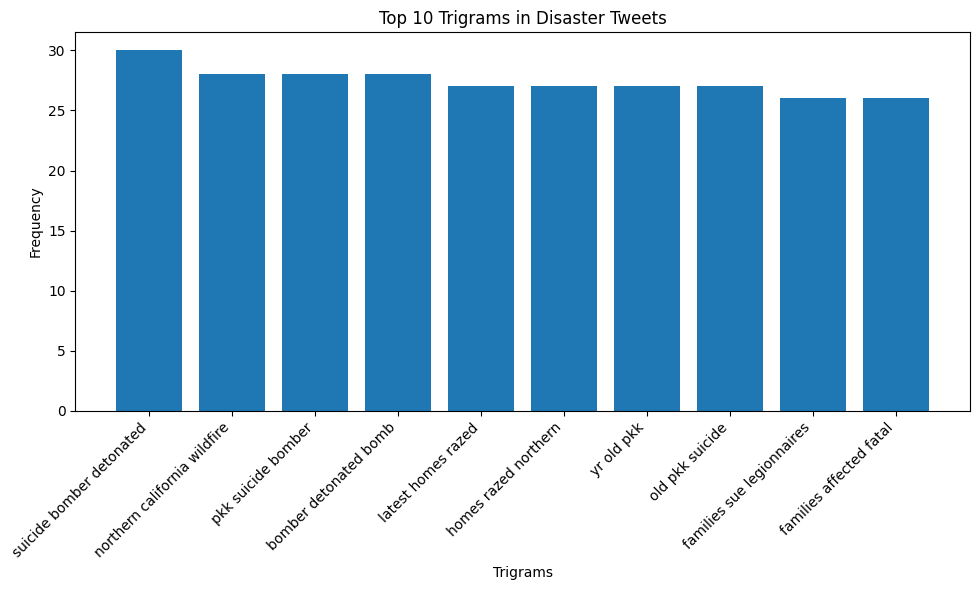

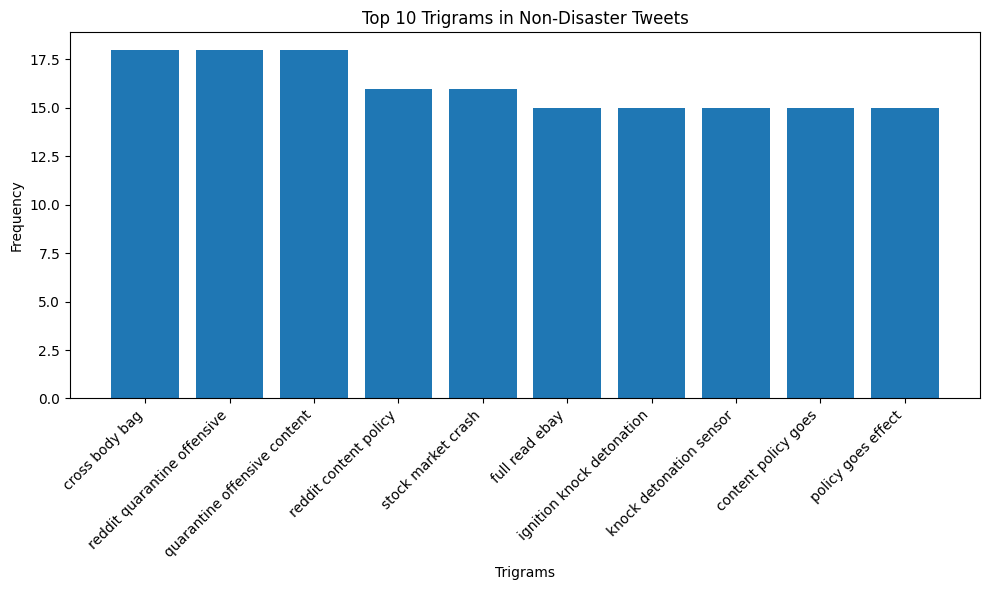

In [ ]:
def plot_trigram_counts(data, title):
    all_words = ' '.join(data).split()
    trigrams = list(ngrams(all_words, 3))
    trigram_counts = Counter(trigrams)

    top_trigrams = trigram_counts.most_common(10)  # Get top 10 trigrams

    trigrams, counts = zip(*top_trigrams)
    trigram_labels = [' '.join(t) for t in trigrams]  # Join trigrams for labels

    plt.figure(figsize=(10, 6))
    plt.bar(trigram_labels, counts)
    plt.xlabel("Trigrams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.tight_layout()
    plt.show()

disaster_tweets = df_train["clean_text"][df_train.target == 1]
plot_trigram_counts(disaster_tweets, "Top 10 Trigrams in Disaster Tweets")

nondisaster_tweets = df_train["clean_text"][df_train.target == 0]
plot_trigram_counts(nondisaster_tweets, "Top 10 Trigrams in Non-Disaster Tweets")

##<font color="FEEB99">**Visualization based Location**</font>

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

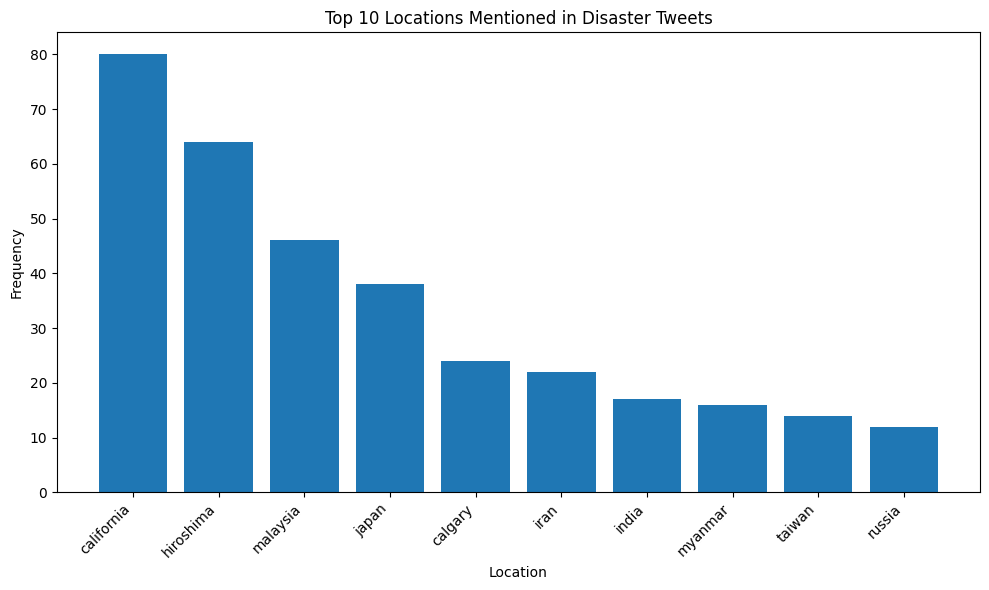

In [ ]:
import spacy
import re
from collections import Counter
from geopy.geocoders import Nominatim

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_location_spacy(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    if locations:
        return locations[0]  # Return the first identified location
    else:
        return None

# Filter for disaster tweets (target=1)
disaster_tweets = df_train[df_train['target'] == 1]

# Extract potential locations using spaCy
potential_locations = disaster_tweets['clean_text'].apply(extract_location_spacy).dropna().tolist()

# Geocoding and frequency counting
geolocator = Nominatim(user_agent="disaster_tweet_map")
valid_locations = []
for location in potential_locations:
    try:
        geocoded_location = geolocator.geocode(location)
        if geocoded_location:
            valid_locations.append(location)
    except Exception as e:
        pass  # Ignore

location_counts = Counter(valid_locations)

# Get the top 10 most common locations
top_10_locations = location_counts.most_common(10)

# Check if top_10_locations is empty before unpacking
if top_10_locations:
    # Extract location names and frequencies if not empty
    location_names, frequencies = zip(*top_10_locations)

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(location_names, frequencies)
    plt.xlabel("Location")
    plt.ylabel("Frequency")
    plt.title("Top 10 Locations Mentioned in Disaster Tweets")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print("No valid locations found for plotting.")

#<font color="90C796">**Modelling**</font>


In [ ]:
# Membagi data menjadi data latih dan data uji
X = vectors
y = df_train["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi awal pada data uji
y_pred = rf_model.predict(X_test)
print("Accuracy Awal:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Awal: 0.7721602101116218
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       874
           1       0.76      0.68      0.72       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.8049901510177282
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       874
           1       0.84      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

logreg_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.7977675640183848
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.72      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.7465528562048588
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       874
           1       0.84      0.50      0.63       649

    accuracy                           0.75      1523
   macro avg       0.78      0.71      0.72      1523
weighted avg       0.77      0.75      0.73      1523



In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7800393959290873
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       874
           1       0.82      0.61      0.70       649

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.76      1523
weighted avg       0.79      0.78      0.77      1523



In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.7846355876559422
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       874
           1       0.76      0.72      0.74       649

    accuracy                           0.78      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.78      0.78      0.78      1523



In [ ]:
# K_Nearest Neighbor (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.6270518713066316
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       874
           1       0.56      0.59      0.57       649

    accuracy                           0.63      1523
   macro avg       0.62      0.62      0.62      1523
weighted avg       0.63      0.63      0.63      1523



In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.7439264609323704
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       874
           1       0.72      0.66      0.69       649

    accuracy                           0.74      1523
   macro avg       0.74      0.73      0.74      1523
weighted avg       0.74      0.74      0.74      1523



#<font color="90C796">**Model Evaluation**</font>


In [ ]:
# Inisialisasi model
models = {
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "Logistic Regression": logreg_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "Naive Bayes": nb_model,
    "K-Nearest Neighbors": knn_model,
    "Decision Tree": dt_model
}


# Dictionary untuk menyimpan hasil akurasi
accuracy_results = {}

# Looping untuk melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Prediksi data uji
    accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi
    accuracy_results[name] = accuracy

# Menampilkan hasil dalam bentuk dataframe
results_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
print("\nPerbandingan Akurasi Model:")
print(results_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:08:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Perbandingan Akurasi Model:
                    Model  Accuracy
0           Random Forest  0.772160
1  Support Vector Machine  0.804990
2     Logistic Regression  0.797768
3       Gradient Boosting  0.746553
4                 XGBoost  0.780039
5             Naive Bayes  0.784636
6     K-Nearest Neighbors  0.627052
7           Decision Tree  0.743926


In [ ]:
# Mengurutkan hasil berdasarkan akurasi dari terbesar ke terkecil
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

print("\nPerbandingan Akurasi Model (Sorted):")
print(results_df_sorted)


Perbandingan Akurasi Model (Sorted):
                    Model  Accuracy
1  Support Vector Machine  0.804990
2     Logistic Regression  0.797768
5             Naive Bayes  0.784636
4                 XGBoost  0.780039
0           Random Forest  0.772160
3       Gradient Boosting  0.746553
7           Decision Tree  0.743926
6     K-Nearest Neighbors  0.627052


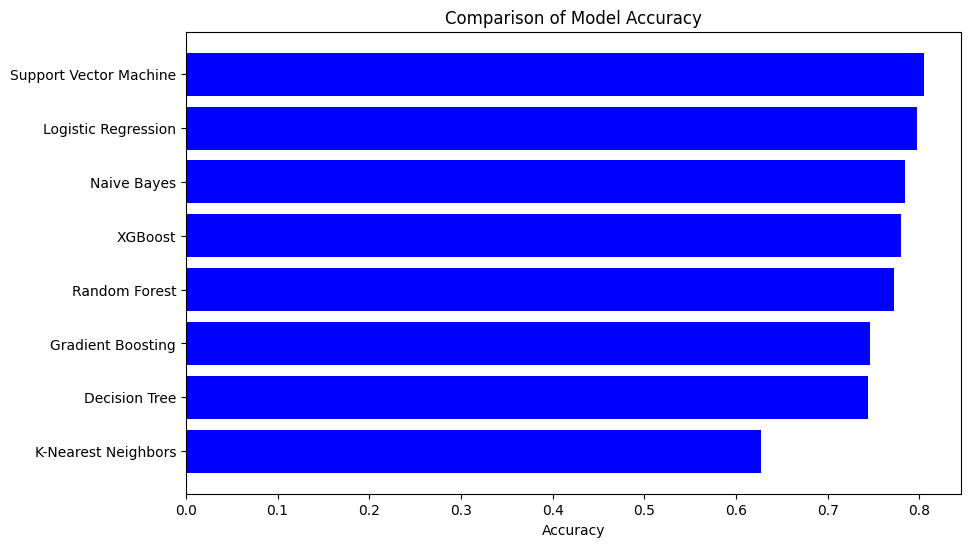

In [ ]:
# Membuat Bar Chart untuk membandingkan akurasi model
plt.figure(figsize=(10, 6))
plt.barh(results_df_sorted['Model'], results_df_sorted['Accuracy'], color='blue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.gca().invert_yaxis()  # Membalik urutan y-axis agar model dengan akurasi tertinggi di atas
plt.show()

Berdasarkan nilai akurasi model, **model SVM** merupakan model dengan akurasi terbaik sebesar 0.804990. Artinya, model ini dapat memprediksi label dengan benar sebanyak **80.5%** dari total sampel yang diuji pada data uji (testing data).

##<font color="FEEB99">**Cross Validation**</font>

In [ ]:
# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary untuk menyimpan hasil cross-validation untuk setiap model
cv_results = {}

# Looping untuk melakukan cross-validation pada setiap model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_results[name] = {
        'Scores': scores,
        'Mean Accuracy': np.mean(scores)
    }

    # Menampilkan hasil cross-validation
    print(f"\n{name} Cross Validation Scores:", scores)
    print(f"{name} Mean Accuracy:", np.mean(scores))

# Jika ingin melihat hasil dalam bentuk DataFrame
import pandas as pd
cv_results_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'Mean Accuracy': [result['Mean Accuracy'] for result in cv_results.values()]
})

# Mengurutkan berdasarkan akurasi dari terbesar ke terkecil
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
print("\nPerbandingan Akurasi Cross-Validation:")
print(cv_results_df)


Random Forest Cross Validation Scores: [0.7816092  0.77339901 0.77996716 0.76436782 0.77996716]
Random Forest Mean Accuracy: 0.7758620689655172

Support Vector Machine Cross Validation Scores: [0.79146141 0.79064039 0.81527094 0.77914614 0.79638752]
Support Vector Machine Mean Accuracy: 0.7945812807881774

Logistic Regression Cross Validation Scores: [0.78571429 0.79146141 0.80213465 0.77175698 0.78899836]
Logistic Regression Mean Accuracy: 0.7880131362889984

Gradient Boosting Cross Validation Scores: [0.74137931 0.70525452 0.76436782 0.727422   0.74712644]
Gradient Boosting Mean Accuracy: 0.7371100164203612


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost Cross Validation Scores: [0.76765189 0.76272578 0.79392447 0.77504105 0.77011494]
XGBoost Mean Accuracy: 0.7738916256157635

Naive Bayes Cross Validation Scores: [0.7816092  0.80377668 0.79064039 0.76600985 0.80131363]
Naive Bayes Mean Accuracy: 0.7886699507389162

K-Nearest Neighbors Cross Validation Scores: [0.63136289 0.59031199 0.61658456 0.61165846 0.57224959]
K-Nearest Neighbors Mean Accuracy: 0.6044334975369458

Decision Tree Cross Validation Scores: [0.73809524 0.72249589 0.7454844  0.72413793 0.7134647 ]
Decision Tree Mean Accuracy: 0.728735632183908

Perbandingan Akurasi Cross-Validation:
                    Model  Mean Accuracy
1  Support Vector Machine       0.794581
5             Naive Bayes       0.788670
2     Logistic Regression       0.788013
0           Random Forest       0.775862
4                 XGBoost       0.773892
3       Gradient Boosting       0.737110
7           Decision Tree       0.728736
6     K-Nearest Neighbors       0.604433


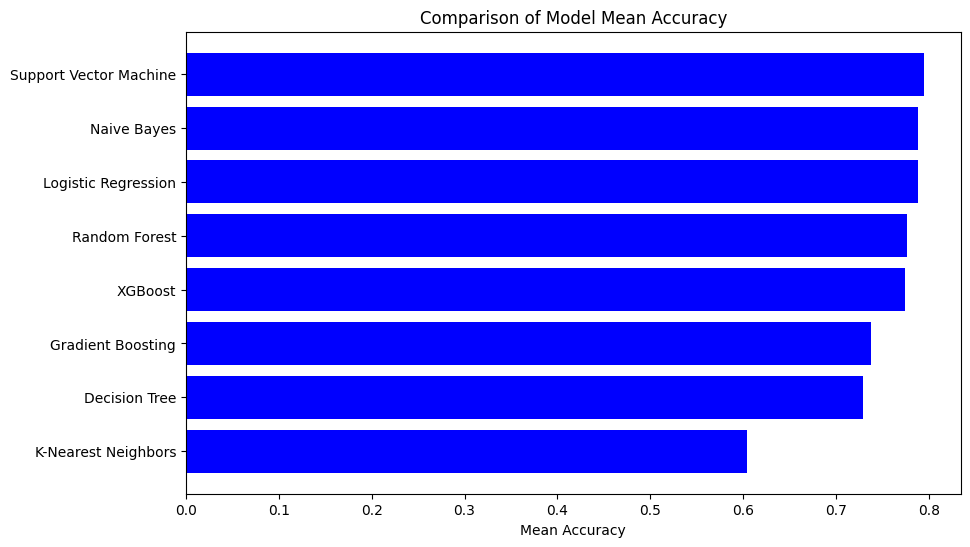

In [ ]:
# Membuat Bar Chart untuk membandingkan akurasi model
plt.figure(figsize=(10, 6))
plt.barh(cv_results_df['Model'], cv_results_df['Mean Accuracy'], color='blue')
plt.xlabel('Mean Accuracy')
plt.title('Comparison of Model Mean Accuracy')
plt.gca().invert_yaxis()  # Membalik urutan y-axis agar model dengan akurasi tertinggi di atas
plt.show()

Berdasarkan nilai akurasi model dengan Cross Validation (k-fold=5), **model SVM** merupakan model dengan akurasi terbaik sebesar 0.794581. Artinya, model ini dapat memprediksi label dengan benar sebanyak **79.5%** dari total sampel yang diuji pada data uji (testing data).

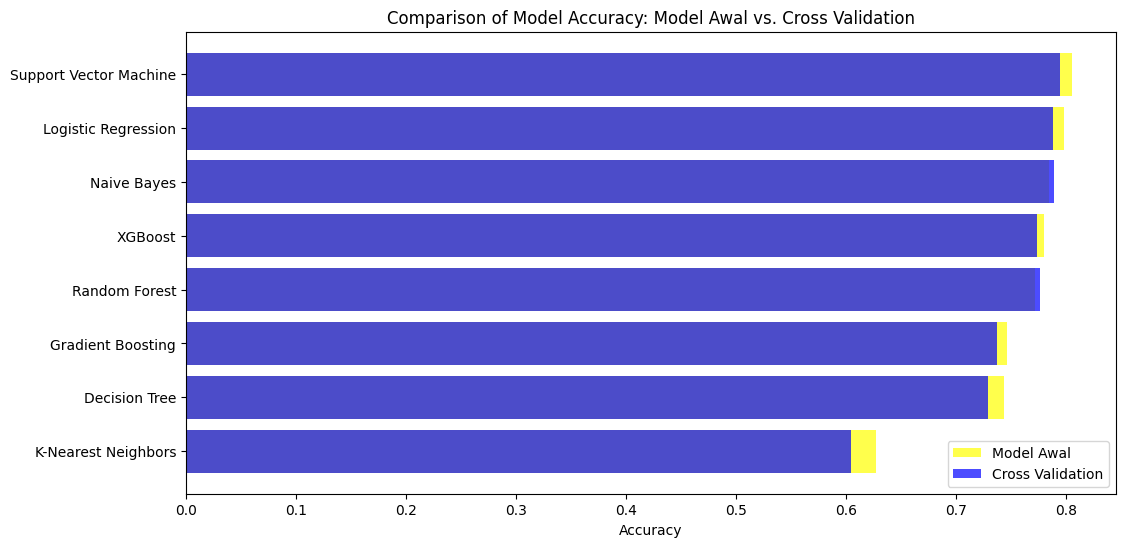

In [ ]:
# Membuat Bar Chart untuk membandingkan kedua hasil (Model Awal dan Cross Validation)
plt.figure(figsize=(12, 6))

# Bar Chart untuk Model Awal
plt.barh(results_df_sorted['Model'], results_df_sorted['Accuracy'], color='yellow', alpha=0.7, label='Model Awal')

# Bar Chart untuk Cross Validation
plt.barh(cv_results_df['Model'], cv_results_df['Mean Accuracy'], color='blue', alpha=0.7, label='Cross Validation')

plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy: Model Awal vs. Cross Validation')
plt.gca().invert_yaxis()  # Membalik urutan y-axis agar model dengan akurasi tertinggi di atas
plt.legend()
plt.show()

Grafik di atas menunjukkan bahwa sebagian besar model (selain Naive Bayes dan Random Forest) memiliki  **nilai akurasi Model Awal yang lebih besar dibandingkan Model dengan Cross Validation (k-fold=5)**. Artinya, Cross Validation mampu memberikan generalisasi yang cukup baik serta objektif pada model.

##<font color="FEEB99">**Optimalisasi Hyperparameter**</font>

In [ ]:
# Mendefinisikan hyperparameters yang akan dicari
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_logreg = {
    'C': [0.1, 1, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_nb = {
    'alpha': [0.5, 1, 1.5]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

param_grid_dt = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Melakukan Grid Search pada setiap model
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# Fit grid search untuk setiap model (menggunakan data latih X_train dan y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_logreg.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_nb.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)

# Menampilkan hasil grid search untuk setiap model
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best parameters for Naive Bayes: {grid_search_nb.best_params_}")
print(f"Best parameters for K-Nearest Neighbors: {grid_search_knn.best_params_}")
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 150}
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best parameters for Logistic Regression: {'C': 1}
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'n_estimators': 150}
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 150}
Best parameters for Naive Bayes: {'alpha': 1.5}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'uniform'}
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 5}


In [ ]:
# Menentukan model terbaik berdasarkan hasil grid search dan evaluasi model pada data uji
models = {
    "Random Forest": grid_search_rf.best_estimator_,
    "SVM": grid_search_svm.best_estimator_,
    "Logistic Regression": grid_search_logreg.best_estimator_,
    "Gradient Boosting": grid_search_gb.best_estimator_,
    "XGBoost": grid_search_xgb.best_estimator_,
    "Naive Bayes": grid_search_nb.best_estimator_,
    "K-Nearest Neighbors": grid_search_knn.best_estimator_,
    "Decision Tree": grid_search_dt.best_estimator_
}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name} on test data:")

    # Prediksi dengan model terbaik
    y_pred = model.predict(X_test)

    # Menampilkan hasil evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Menyimpan hasil akurasi dalam DataFrame
accuracy_df_hyper = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Menyortir berdasarkan akurasi tertinggi
accuracy_df_hyper_sorted = accuracy_df_hyper.sort_values(by='Accuracy', ascending=False)


Evaluating Random Forest on test data:
Test Accuracy for Random Forest: 0.7728168089297439

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       874
           1       0.76      0.68      0.72       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523


Evaluating SVM on test data:
Test Accuracy for SVM: 0.8049901510177282

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       874
           1       0.84      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523


Evaluating Logistic Regression on test data:
Test Accuracy for Logistic Regression: 0.7977675640183848

Classification Report:
      

In [ ]:
print("\nPerbandingan Akurasi Model (Hyperparameter Tuning):")
print(accuracy_df_hyper_sorted)


Perbandingan Akurasi Model (Hyperparameter Tuning):
                    Model  Accuracy
1  Support Vector Machine  0.804990
2     Logistic Regression  0.797768
5             Naive Bayes  0.784636
4                 XGBoost  0.780039
0           Random Forest  0.772160
3       Gradient Boosting  0.746553
7           Decision Tree  0.743926
6     K-Nearest Neighbors  0.627052


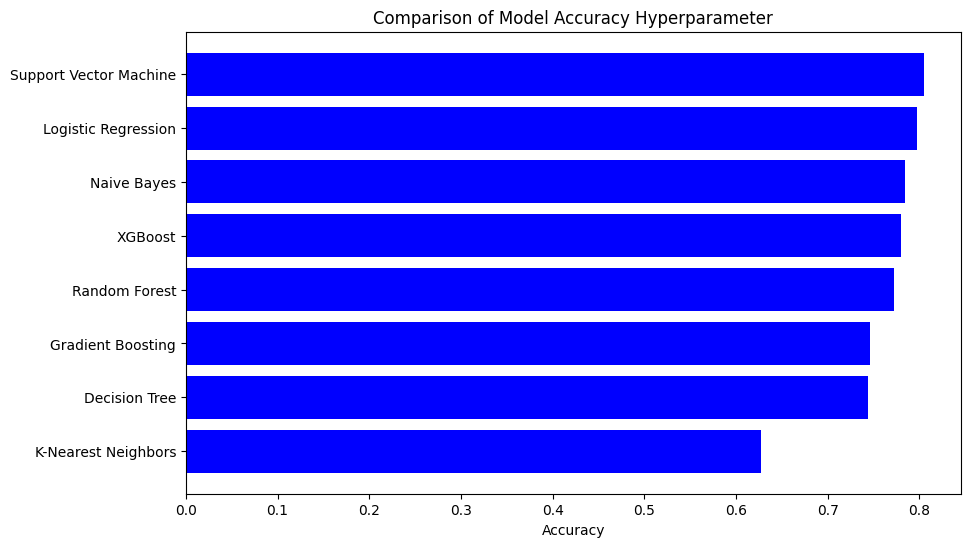

In [ ]:
# Menampilkan hasil dalam bentuk bar chart
plt.figure(figsize=(10, 6))
plt.barh(accuracy_df_hyper_sorted['Model'], accuracy_df_hyper_sorted['Accuracy'], color='blue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy Hyperparameter')
plt.gca().invert_yaxis()  # Membalik urutan y-axis agar model dengan akurasi tertinggi di atas
plt.show()

Berdasarkan nilai akurasi model, **model SVM** merupakan model dengan akurasi terbaik sebesar 0.804990. Artinya, model ini dapat memprediksi label dengan benar sebanyak **80.5%** dari total sampel yang diuji pada data uji (testing data). Hasil ini sama persis dengan model awal.

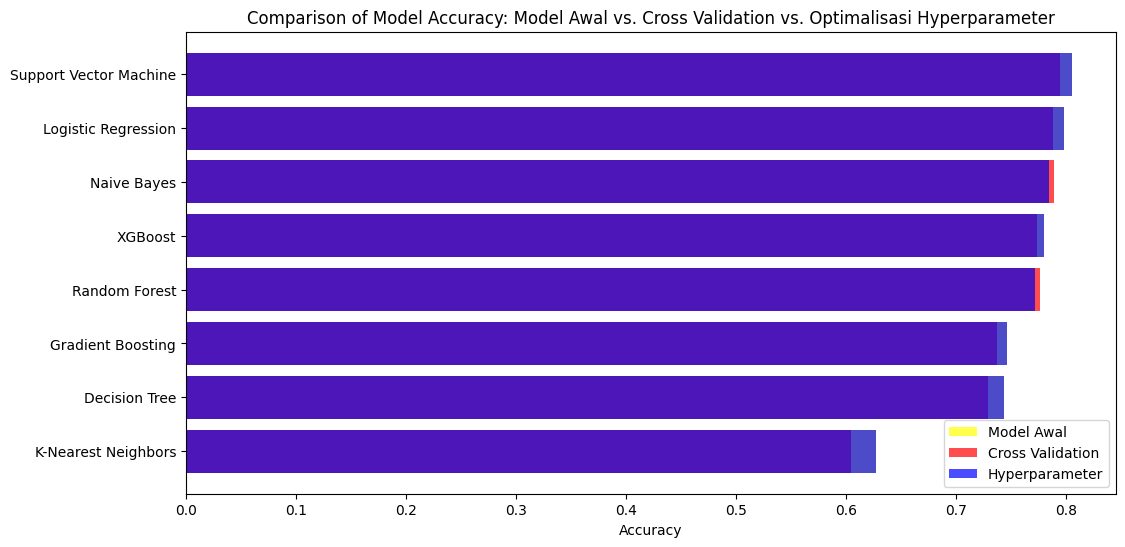

In [ ]:
# Membuat Bar Chart untuk membandingkan ketiga hasil (Model Awal, Cross Validation, dan Optimalisasi Hyperparameter)
plt.figure(figsize=(12, 6))

# Bar Chart untuk Model Awal
plt.barh(results_df_sorted['Model'], results_df_sorted['Accuracy'], color='yellow', alpha=0.7, label='Model Awal')

# Bar Chart untuk Cross Validation
plt.barh(cv_results_df['Model'], cv_results_df['Mean Accuracy'], color='red', alpha=0.7, label='Cross Validation')

# Bar Chart untuk Cross Validation
plt.barh(accuracy_df_hyper['Model'], accuracy_df_hyper['Accuracy'], color='blue', alpha=0.7, label='Hyperparameter')

plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy: Model Awal vs. Cross Validation vs. Optimalisasi Hyperparameter')
plt.gca().invert_yaxis()  # Membalik urutan y-axis agar model dengan akurasi tertinggi di atas
plt.legend()
plt.show()

Grafik di atas menunjukkan bahwa sebagian besar model (selain Naive Bayes dan Random Forest) memiliki  **nilai akurasi Model dengan Optimalisasi Hyperparameter yang lebih besar dibandingkan Model dengan Cross Validation (k-fold=5) dan Model Awal**. Artinya, Optimalisasi Hyperparameter lebih cocok digunakan untuk dataset karena dapat memaksimalkan akurasi pada data uji yang serupa dengan data pelatihan dengan kasus atau topik tweets tertentu.

##<font color="FEEB99">**Ensemble Model**</font>

In [ ]:
# Membuat Voting Classifier (menggunakan hard voting, di mana model memilih kelas mayoritas)
ensemble_model = VotingClassifier(
    estimators=[('svm', svm_model), ('logreg', logreg_model), ('nb', nb_model)],
    voting='hard'  # Bisa menggunakan 'soft' untuk probabilistic voting jika model mendukung
)

# Melatih ensemble model
ensemble_model.fit(X_train, y_train)

# Prediksi dengan ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_ensemble)

# Menampilkan hasil evaluasi
print(f"Ensemble Model Accuracy: {accuracy}")

Ensemble Model Accuracy: 0.8030203545633617


Ensemble ketiga model terbaik nyatanya tidak memberikan nilai akurasi yang lebih baik dari model SVM dengan optimalisasi hyperparameter.

##<font color="FEEB99">**Kesimpulan Evaluasi Model**</font>

Berdasarkan beberapa tahapan evaluasi di atas, diperoleh model terbaik adalah model Support Vector Machine (SVM) dengan optimalisasi hyperparameter yang mencapai akurasi 80,5%.

#<font color="90C796">**Prediction**</font>

Disini kita memprediksi data test dengan model terbaik yaitu model Support Vector Machine (SVM) dengan optimalisasi hyperparameter dan menyimpannya dalam dataframe Submission1

In [ ]:
# Menggunakan model SVM terbaik setelah hyperparameter tuning
optimal_svm_model = grid_search_svm.best_estimator_

# Melakukan prediksi pada df_test
df_test['target'] = optimal_svm_model.predict(df_test)

# Menyimpan hasil prediksi dalam format yang sesuai untuk Kaggle
Submission1 = df_test[['id', 'target']]

# Menyimpan ke file CSV
Submission1.to_csv('Submission1.csv', index=False)